## $\underline{ \textbf{Non-linear Panel Flutter}}$

**References** :   

[1] : [Bogdan I. Epureanu, Liaosha S. Tang, Michael P. Paı̈doussis, "Coherent structures and their influence on the dynamics of aeroelastic panels", International Journal of Non-Linear Mechanics, pp. 977-991 (2004)](https://dropsu.sorbonne-universite.fr/s/TWjqPLLirgessm4)

[2] : [Lee Joo-Sung, "Modélisations temporelle et fréquentielle des instabilités aéroélastiques dynamiques", Stage in Institut Jean Le Rond D’Alembert, pp. 15-27](https://dropsu.sorbonne-universite.fr/s/KtdLPcXdkDoyjAZ)


**Purpose** : Resolution of the equations of motion of a bi-supported elastic plate in a supersonic flow. And the analysis of the limit cycles of oscillations. [...]  

**Physical context:** In this notebook, the structural system is solved with a spatial disctretization of the plate (and not with a canonical mass-spring system). 


-------


A. Chaarane, Institute $\partial$' Alembert, (v2, 13 Dec 2021) 

----

##### **SUMMARY :**



In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.iput').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


### Import useful Python modules

In [2]:
# -------------- global import
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

# local imprt 
import Post_Trait as PST

# import the Config
sys.path.append('../')
from Config import CFG_PANEL


# define folder for save solution 
DATA_PATH = "../Data/Data_Ref/"

# I. Modeling the problem

We consider a transonic flow, of velocity $U_\infty$, around a 2D rectangular plate of thickness h, length l and width b. we note by $X$ the horizontal position on the plate and $W(X,t)$ is the transverse deflection of the panel.

![model_panel_1D](model_panel.png )

The plate is in simple support on these ends.

\begin{equation}
\begin{array}{ll}
W(X=0, t)=0, & W^{\prime \prime}(X=0, t)=0 \\
W(X=l, t)=0, & W^{\prime \prime}(X=l, t)=0
\end{array}
\end{equation}

### I.1 Governing equations :

We seek to model the vertical deformation $W$ of the plate as a function of position $X$ and time $t$. The aeroelastic model is based on the von Karman plate theory and the equation of the plate deformation can be written as follows ( cf.[[1]](#)):

\begin{equation}
D b W^{\prime \prime \prime \prime}+\rho h b \ddot{W}-N b W^{\prime \prime}+\hat{P} b=0 \quad \quad (*)
\end{equation}

where $w^{\prime} = \frac{\partial W}{\partial X}$ and  $\dot{w }= \frac{\partial W}{\partial t}$

Whose parameters are defined as follows  :
- $D$ is  the bending stiffness or rigidity of the panel : $$D=\frac{E h^{3}}{12(1-\nu)} $$
- $N$ expresses the elastic longitudinal tension of the plate  : $$N=E h\left[\eta+\frac{1}{2 \ell} \int_{0}^{\ell} W^{\prime 2}(\xi) \mathrm{d} \xi\right]$$ 
- $\hat{P}$ represents the external forces  : $$\hat{P}=\frac{\rho_{\infty} U_{\infty}^{2}}{M_{\infty}} W^{\prime}+\frac{\rho_{\infty} U_{\infty}}{M_{\infty}} \dot{W}+\Delta p$$


$E$, $\nu$ and  $\rho$ are respectively the Young's modulus, the Poisson's ratio and the mass density of the plate.
$M_\infty$, $U_\infty$ and $\rho_\infty$ are respectively the Mach number, the flow velocity and the density of the fluid.

### I.2 Dimensionless equations : 

We define the following dimensionless parameters:

\begin{equation}
x=\frac{X}{\ell}, \quad w=\frac{W}{h}, \quad \tau=\frac{t}{\sqrt{\frac{\rho h \ell^{4}}{D}}}
\end{equation}

In order to simplify the equation of motion of the plate, we introduce the following parameters:

\begin{equation}
\lambda=\frac{\rho_{\infty} U_{\infty}^{2} \ell^{3}}{M_{\infty} D} ; \quad R_{x}=\frac{E h \eta \ell^{2}}{D} ; \quad P=-\frac{\ell^{4} \Delta p}{D h} ; \quad G=\frac{E h^{3}}{2 D} ; \quad \mu=\frac{\rho_{\infty} \ell}{\rho h}
\end{equation}

where $\gamma$ characterizes the flow velocity, $R_{x}$ characterizes the tension of the structure, $P$ the pressure difference, $G$ characterizes the material type of the structure and $\mu$ the mass ratio.

After introducing these parameters into the plate deformation equation and replacing the parameters $N$ and $\hat{P}$, the plate deformation equation becomes ( cf.[[1]](#)):

\begin{equation}
\ddot{w}+\sqrt{\frac{\mu \lambda}{M_{\infty}}} \dot{w}+w^{\prime \prime \prime \prime}-R_{x} w^{\prime \prime}-G\left[\int_{0}^{1} w^{\prime 2}(\xi) \mathrm{d} \xi\right] w^{\prime \prime}+\lambda w^{\prime}=P  \quad \quad (**)
\end{equation}

# II. Numerical methods  

### II.1 Finite difference approach

For the spatial discretization of the system several methods can be adopted, we can quote for example the **Galerkin method** or the finite element method. Here we present the **finite difference approach** where the panel is discretized into M sections, and ghost nodes are added at each end of the panel (i.e. we have  M+3 nodes). we define N =M+1 as the number of physical points. 

For a given noueds $i$, the centered difference scheme at **order 2** is written : 

$$ \frac{\partial^{4} w_{i}}{\partial x^{4}}=\frac{w_{i-2}-4 w_{i-1}+6 w_{i}-4 w_{i+1}+w_{i+2}}{\Delta x^{4}} $$
$$ \frac{\partial^{2} w_{i}}{\partial x^{2}}=\frac{w_{i-1}-2 w_{i}+w_{i+1}}{\Delta x^{2}}  $$ 
$$ \frac{\partial w_{i}}{\partial x}=\frac{-w_{i-1}+w_{i+1}}{2 \Delta x}$$





After applying a centered difference, the  **equation $(**)$** can be written in a discretized form as follows( cf.[[2]](#)):

\begin{equation}
[\mathrm{M}] \ddot{\textbf{w}}+[\mathrm{C}] \dot{\textbf{w}}+([\mathrm{K}]+[\mathrm{S}]) \textbf{w}=0  \quad \quad (***)
\end{equation}

where $\textbf{w} = [ w_{0}^k, w_{1}^k, \ldots, w_{N}^k, w_{N+1}^k ] $ is  the displacements of all the nodes at each time $\tau_k$,   the matrices $\textbf{M}$ and $\textbf{C}$ are respectively given $ \textbf{M} = \textbf{I}  \text{ and } \textbf{C} = c_b \textbf{I}$, the matrix $\textbf{K}$ correspond to the discretized expressions of the derivatives and the matrix $\textbf{S}$ contains the integral term, of the equation $(*)$, and this last one will be calculated with the trapezoidal method.


with $ c_b = \sqrt{\frac{\mu \lambda}{M_{\infty}}} $
#### Consideration of boundary conditions 


Adopting the numbering of the nodes from 1 to N, the boundary conditions can be written as follows:

\begin{equation}
\begin{array}{ll}
w_1=0, & w^{\prime \prime}_1 =0 \\
w_N=0, & w^{\prime \prime}_N=0
\end{array}
\end{equation}

Then we apply the expressions of the centered difference and we obtain $w_0 =- w_2 $ and $w_{N+1} = - w_N$. With these relations plus the boundary conditions, we can rewrite the displacement vector in a reduced way on the numbering $i = 2$ to $i = N-1$, so as to have $\textbf{w} = [ w_{2}^k, w_{3}^k,\ldots ,w_{N-1}^k ]$.

The matrices $\textbf{M}$, $\textbf{C}$, $\textbf{K}$ and $\textbf{S}$ are therefore of dimension $N-2 \times N-2$. See their expressions in the appendices (**todo ...**).


### II.2 Time integration

After the spatial discretization, we have to develop the temporal integration. For this, we can find several methods in the literature. But here we use the **Backward differentiation formula (BDF)** : a family of implicit methods of integration of ordinary differential equations which are mainly used to solve rigid differential equations (which is our case, I think). We used the **BDF** solver of the **scipy** module with a time step of **$\Delta\tau=10^{-2}$** and a tolerance of $10^{-12}$ at each time step. The **BDF** solver of the **scipy** module has the particularity to have an **order automatically varying** from 1 to 5

To do this we start by rewriting the equation $(***)$ as follows:

\begin{equation}
\left\{\begin{array}{l}
v=\dot{w} \\
\dot{v}= - [M]^{-1}\big( [C]v  + ([K] +[S])w \big)
\end{array}\right.
\end{equation}

## III. Solver validation

In order to validate our solver, we will recover the results of B.I. Epureanu at all [1]. We consider that the plate undergoes an initial displacement given by  :

$$ w(x,\tau=0)=0.1sin(\pi x)$$


We set the parameters as shown in the table below. we will vary $R_x$ .

| | | | |
|-|-|-|-|
|$\nu$|$G$   |$\lambda$ |$\sqrt{\mu/M_\infty}$|
|$0.33$|$5.46$|$150$     | $0.1$ |

In the following examples, we place ourselves at an **$x_p$ = 1/4** of the panel for different values of the parameter $R_x$.

In [3]:
cfg = CFG_PANEL()


### - For $R_x= -2.8 \pi^2$ 

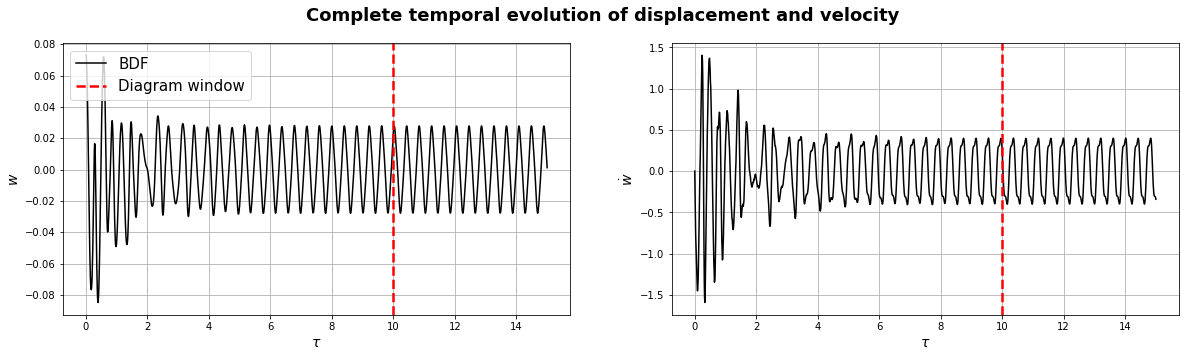

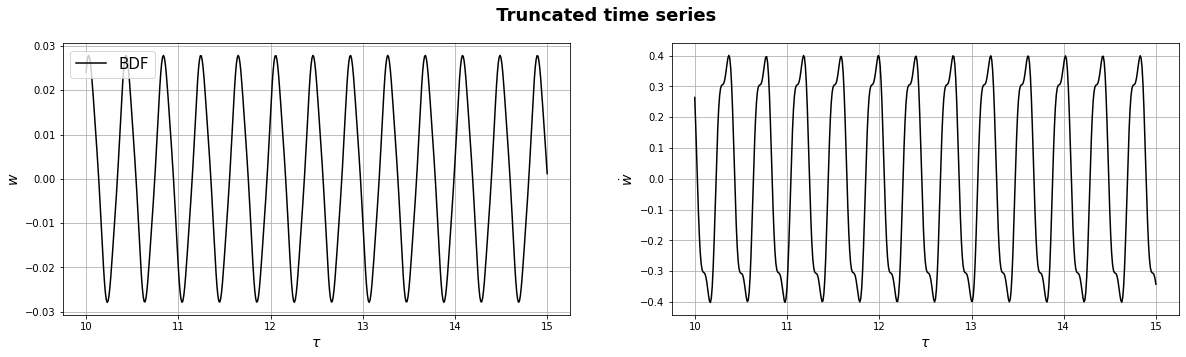

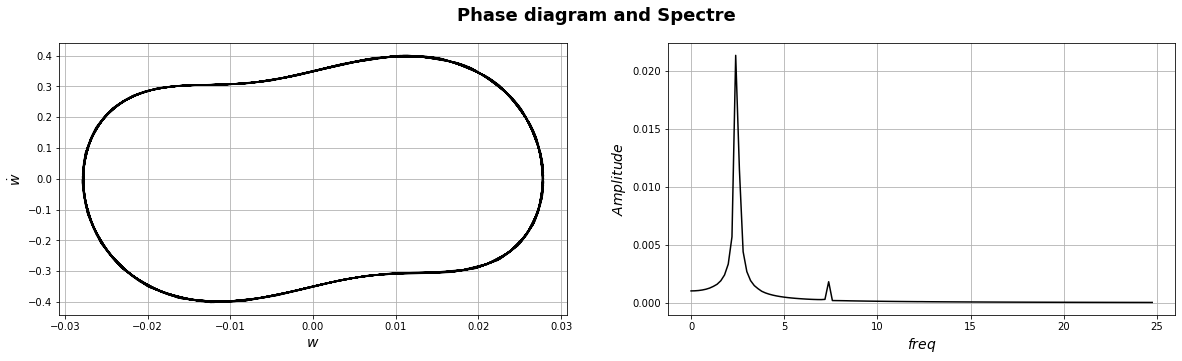

In [15]:
t_show_diag = 10 # start of the diagram window

cfg.Rx = -2.8*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)

### - For $R_x= -3 \pi^2$ 

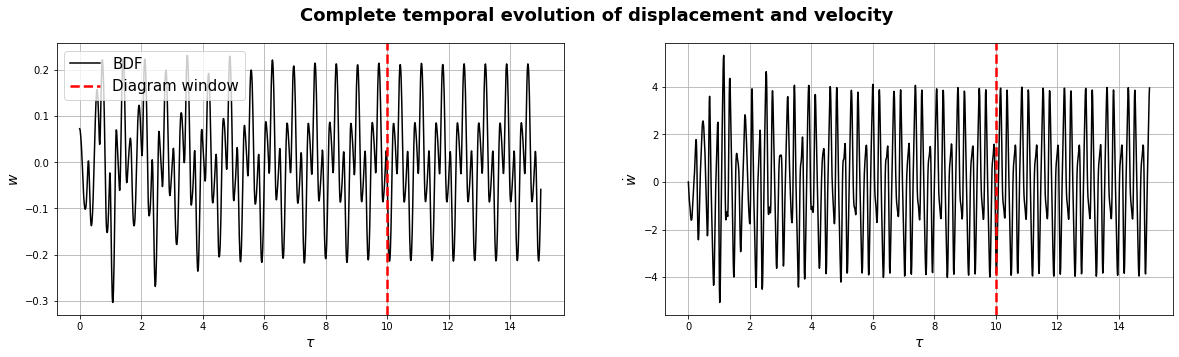

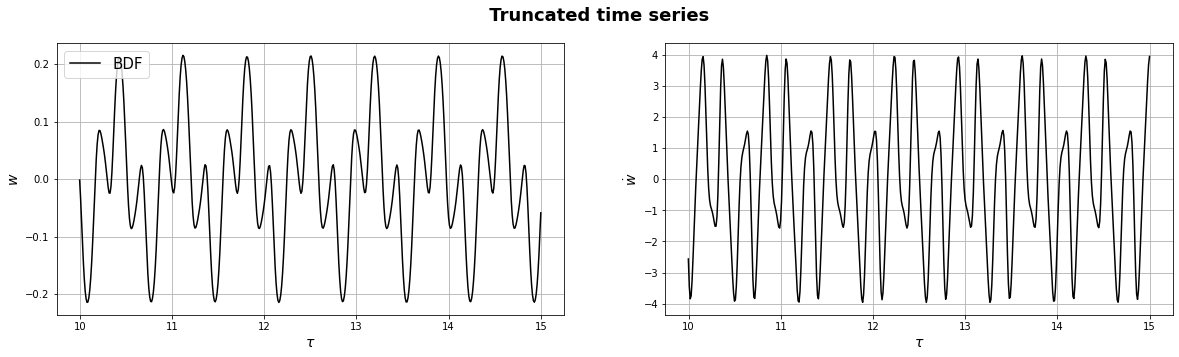

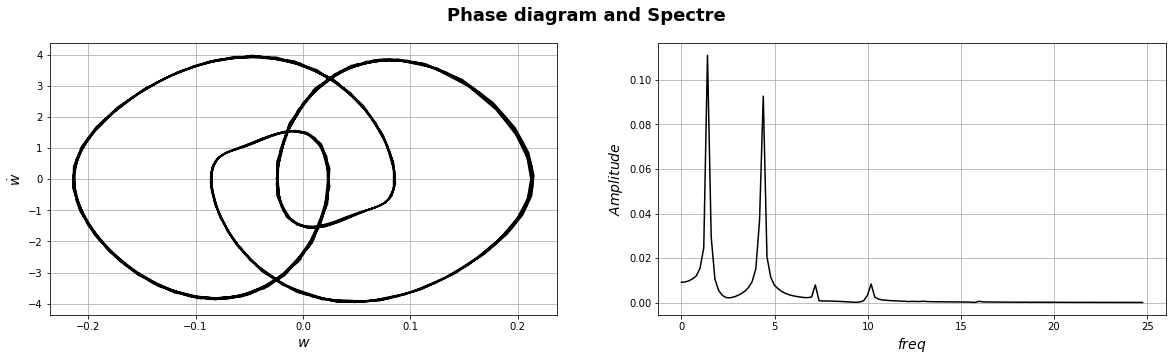

In [14]:
t_show_diag = 10 # start of the diagram window

cfg.Rx = -3.*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)


### - For $R_x= -3.26 \pi^2$ 

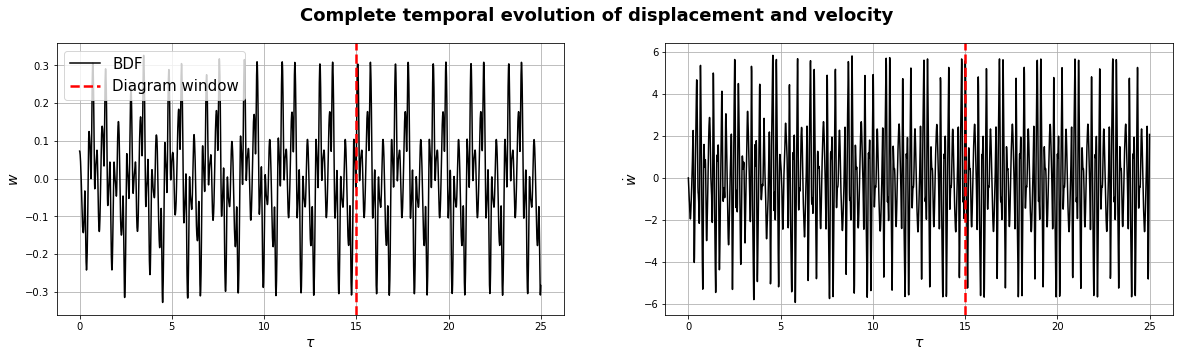

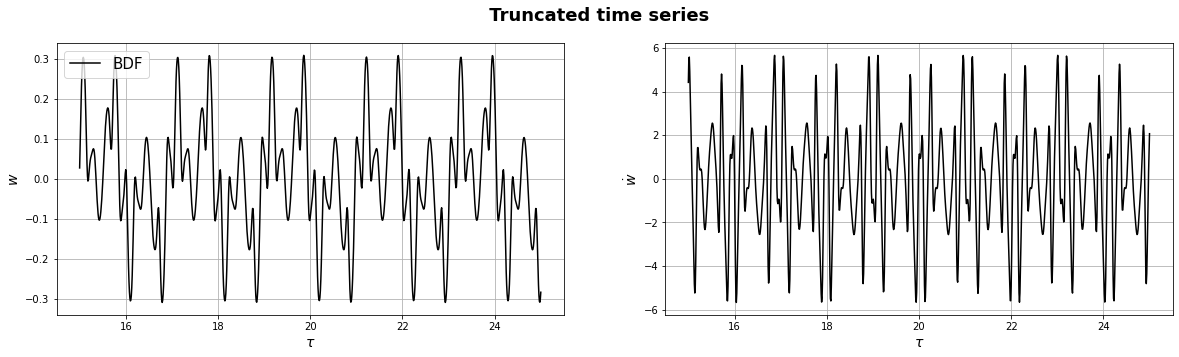

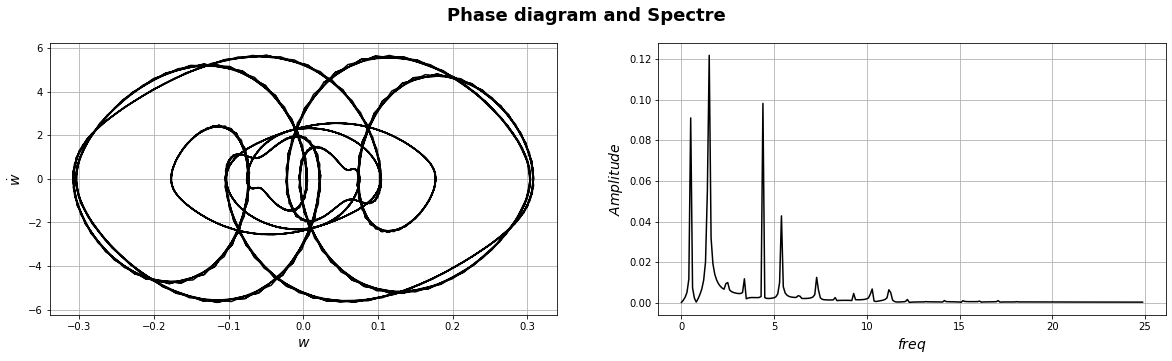

In [6]:
t_show_diag = 15 # start of the diagram window

cfg.Rx = -3.26*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)

### - For $R_x= -3.45 \pi^2$ 

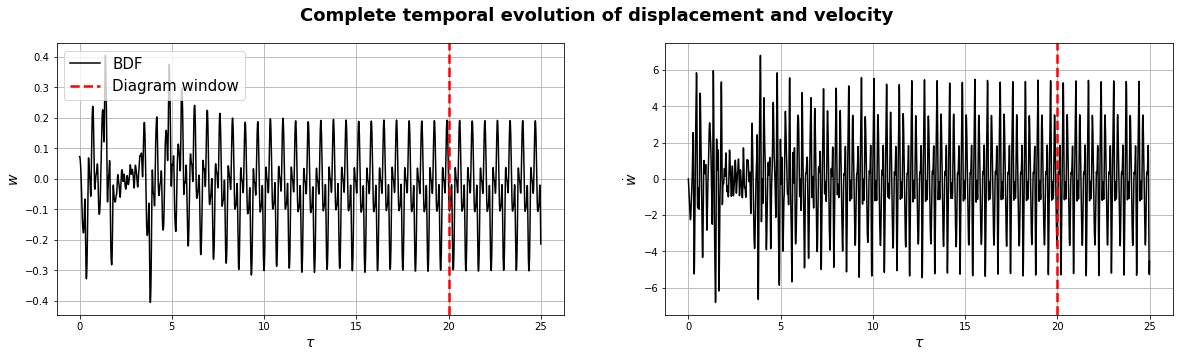

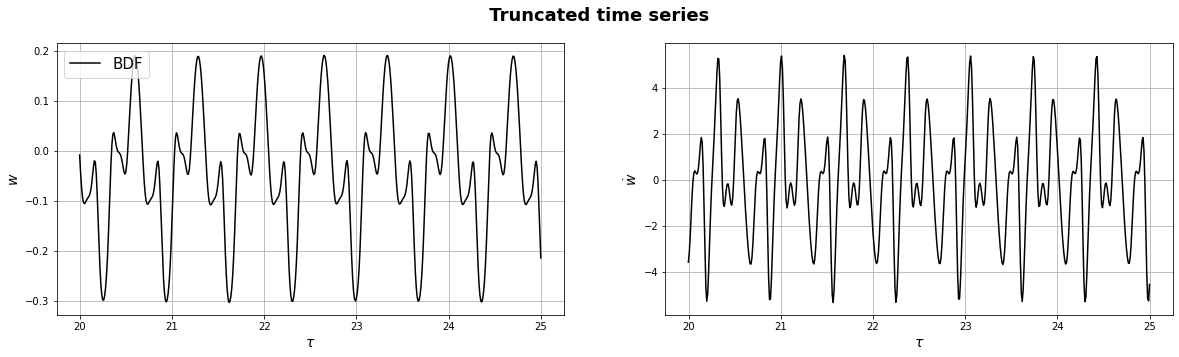

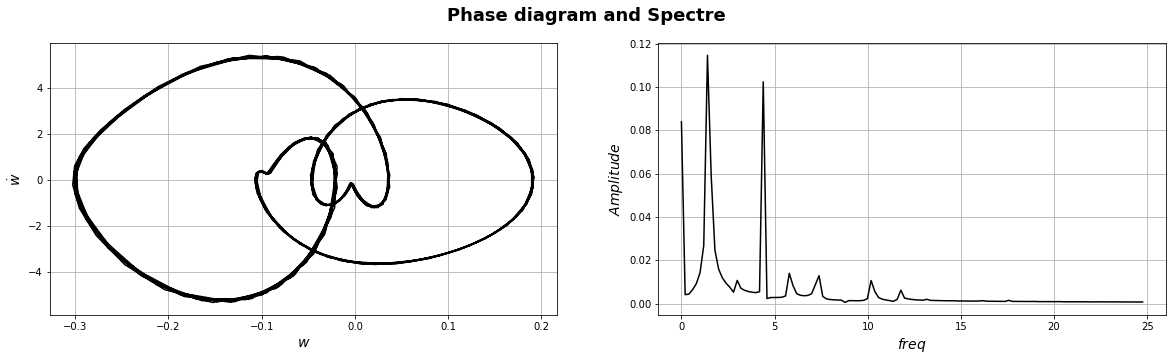

In [12]:
t_show_diag = 20 # start of the diagram window

cfg.Rx = -3.45*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)

### - For $R_x= -3.6 \pi^2$ 

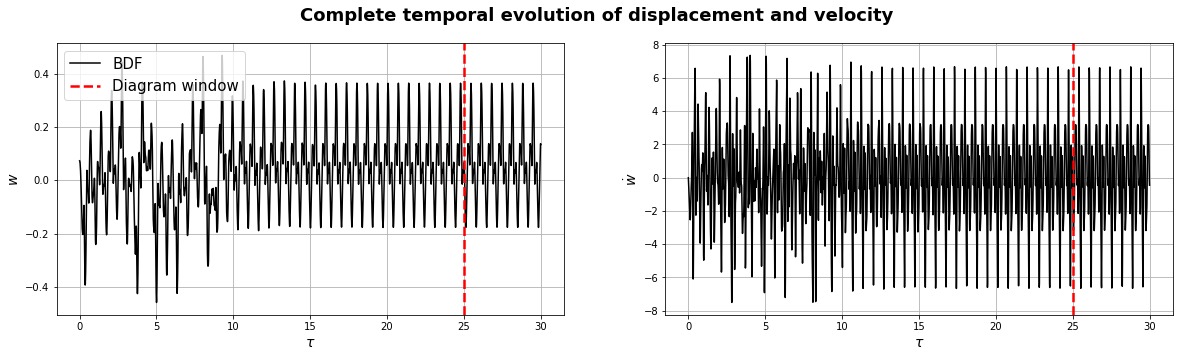

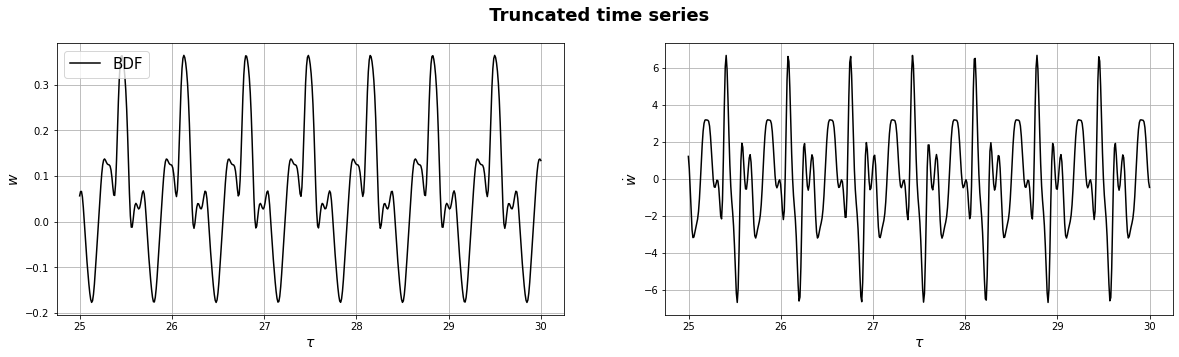

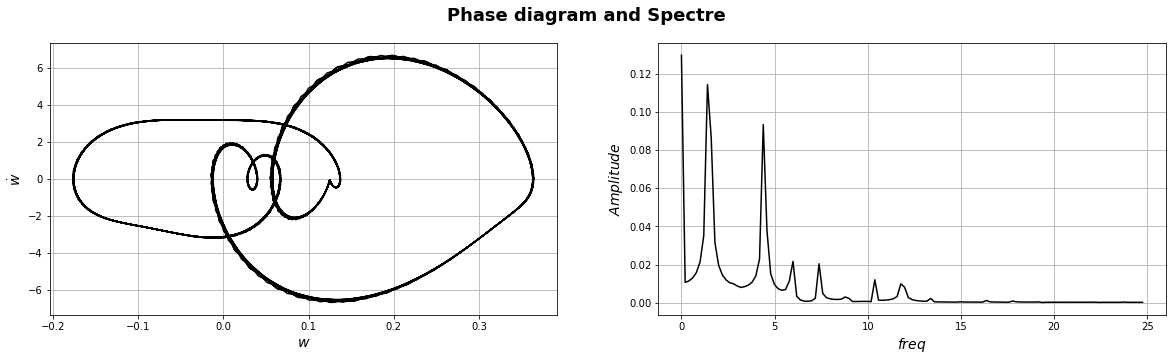

In [8]:
t_show_diag = 25 # start of the diagram window

cfg.Rx = -3.6*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)

### - For $R_x= -4.4 \pi^2$ 

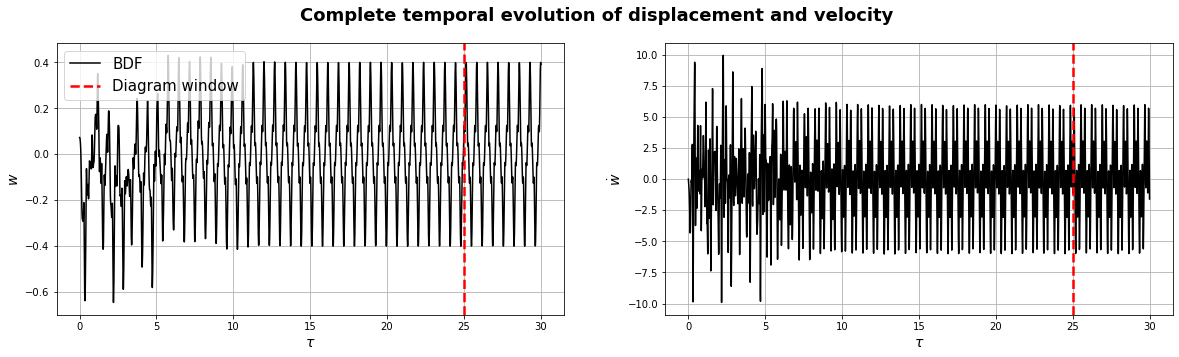

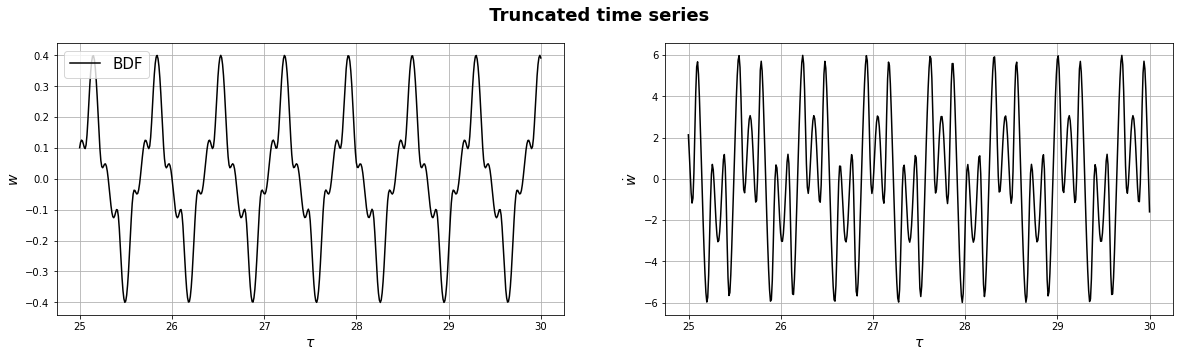

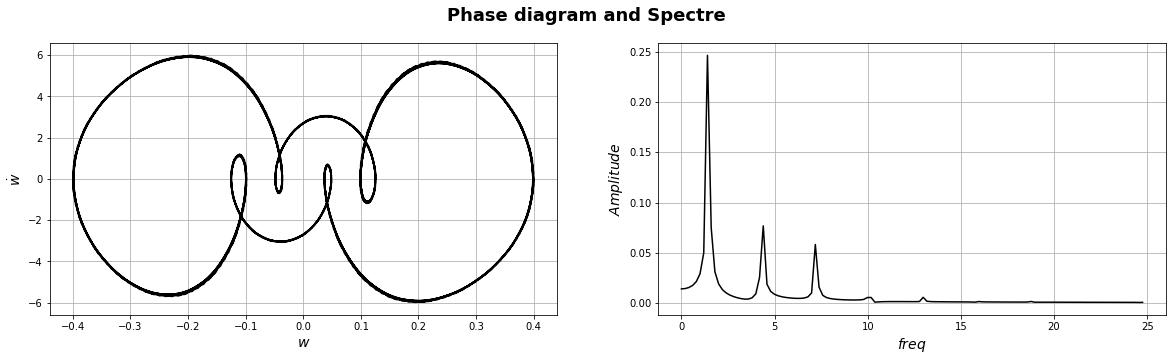

In [11]:
t_show_diag = 25 # start of the diagram window

cfg.Rx = -4.4*(np.pi)**2
time,w_disp,w_vel = PST.Load_solution(cfg,DATA_PATH)

# full time

plt.figure(figsize=(20,5))
PST.plot_time_history(time,w_disp,w_vel ,cfg ,t_show_diag=t_show_diag,label_diag= True)

# time cut 
plt.figure(figsize=(20,5))
PST.plot_time_history_cut(time,w_disp,w_vel,cfg , t_show_diag=t_show_diag)

# diag and fft

plt.figure(figsize=(20,5))
PST.plot_diag_fft(time,w_disp, w_vel, cfg, t_show_diag = t_show_diag,  typ_diag='-', coef_spec_size = 4)
